# Packages

In [1]:
%load_ext autoreload
%autoreload 2

In [36]:
import datetime
import nbimporter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import warnings
import seaborn as sns

from notebooks.famkab_functions import number_of_observations
from notebooks.famkab_functions import complete_timestamp_day
from notebooks.famkab_functions import date_index
from notebooks.famkab_functions import solar_elevation
from notebooks.famkab_functions import clear_sky_condition
from notebooks.famkab_functions import cloudy_sky_condition
from notebooks.famkab_functions import solar_azimuth_angle
from notebooks.famkab_functions import one_day_evolution

pd.set_option ('display.max_columns', None)

# Importing data

In [3]:
# Load data from raw_data
data = np.load('../raw_data/X_train.npz', allow_pickle=True)

# Contents of data

In [4]:
# Display the contents of the .npz file
data.files

['datetime', 'GHI', 'CLS', 'SZA', 'SAA']

In [5]:
# Extract features from data
GHI = data['GHI']
CLS = data['CLS']
SAA = data['SAA']
SZA = data['SZA']
DATE = data['datetime']

In [6]:
# Defining variables
# For example - GHI[99,:,:,:]

observation = 99 # 1 through 1845
observation_time = 0 # 0, 1, 2, 3, 4, 5, 6, 7, 8
pixel_frame_x = 0 # 81 pixels
pixel_frame_y = 0 # 81 pixels

# Contents of the DATE feature

In [7]:
# Display the contents of the datetime feature
DATE

array([datetime.datetime(2012, 1, 1, 9, 15),
       datetime.datetime(2012, 1, 1, 11, 15),
       datetime.datetime(2012, 1, 1, 13, 15), ...,
       datetime.datetime(2012, 12, 31, 11, 15),
       datetime.datetime(2012, 12, 31, 13, 15),
       datetime.datetime(2012, 12, 31, 15, 15)], dtype=object)

In [8]:
print (type(DATE))
print (DATE.shape)

numpy.ndarray

In [ ]:
# printing the whole timestamp for a specific day
# Please Emilio improve this function!
complete_timestamp_day(observation= date_index('31-01-2012')[0])

In [10]:
index = ["5:45","6:00","6:15","6:30","6:45","7:00","7:15","7:30","7:45", "8:00", "8:15","8:30", "8:45", "9:00", "9:15", "9:30", "9:45", "10:00", "10:15", "10:30", "10:45", "11:00","11:15", "11:30", "11:45" , "12:00", "12:15", "12:30", "12:45", "13:00", "13:15", "13:30", "13:45", "14:00", "14:15", "14:30", "14:45", "15:00", "15:15", "15:30", "15:45", "16:00", "16:15", "16:30", "16:45", "17:00" , "17:15", "17:30", "17:45", "18:00", "18:15"]

a = ["n/a","n/a","n/a","n/a","n/a","n/a", "n/a","n/a","n/a", "n/a","n/a","a", "a","a","9:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a", "11:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","13:15","tbp", "tbp", "tbp","tbp", "a", "a", "a", "15:15", "tbp", "tbp", "tbp", "tbp", "n/a","n/a", "n/a", "n/a", "n/a", "n/a","n/a","n/a"]
b = ["n/a","n/a","n/a","n/a", "n/a","n/a", "n/a","n/a","n/a", "n/a","a","a","a", "9:00", "tbp", "tbp", "tbp","tbp", "a", "a", "a","11:00", "tbp", "tbp", "tbp","tbp", "a", "a", "a","13:00", "tbp", "tbp", "tbp","tbp", "a", "a", "a","15:00", "tbp", "tbp", "tbp", "tbp", "n/a", "n/a","n/a", "n/a", "n/a", "n/a", "n/a","n/a","n/a"]
c = ["n/a","n/a","n/a","n/a","n/a","n/a", "n/a","n/a","n/a", "a","a","a", "8:45", "tbp", "tbp", "tbp","tbp", "a", "a", "a","10:45", "tbp", "tbp", "tbp","tbp", "a", "a", "a","12:45","tbp", "tbp", "tbp","tbp", "a", "a", "a", "14:45", "tbp", "tbp", "tbp", "tbp", "n/a", "n/a", "n/a","n/a", "n/a", "n/a", "n/a", "n/a","n/a","n/a"]
d = ["n/a","n/a","n/a","n/a", "n/a","n/a", "n/a","n/a","a", "a","a","8:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","10:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","12:30","tbp", "tbp", "tbp","tbp", "a", "a", "a", "14:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","16:30", "tbp", "tbp", "tbp", "tbp", "n/a","n/a","n/a"]
e = ["n/a","n/a", "n/a","n/a","n/a","n/a", "n/a","a", "a","a","8:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","10:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","12:15","tbp", "tbp", "tbp","tbp", "a", "a", "a", "14:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","16:15", "tbp", "tbp", "tbp", "tbp", "n/a", "n/a","n/a","n/a"]
f = ["n/a","n/a", "n/a","n/a","n/a","n/a","a", "a","a","8:00", "tbp", "tbp", "tbp","tbp", "a", "a", "a","10:00", "tbp", "tbp", "tbp","tbp", "a", "a", "a","12:00","tbp", "tbp", "tbp","tbp", "a", "a", "a", "14:00", "tbp", "tbp", "tbp","tbp", "a", "a", "a","16:00", "tbp", "tbp", "tbp", "tbp", "n/a","n/a", "n/a","n/a","n/a"]
g = ["n/a","n/a","n/a", "n/a","n/a","a", "a","a","7:45", "tbp", "tbp", "tbp","tbp", "a", "a", "a","9:45", "tbp", "tbp", "tbp","tbp", "a", "a", "a","11:45","tbp", "tbp", "tbp","tbp", "a", "a", "a", "13:45", "tbp", "tbp", "tbp","tbp", "a", "a", "a","15:45", "tbp", "tbp", "tbp", "tbp", "n/a","n/a","n/a", "n/a","n/a","n/a"]
h = ["n/a","n/a","n/a","n/a", "a", "a","a","7:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","9:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","11:30","tbp", "tbp", "tbp","tbp", "a", "a", "a", "13:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","15:30", "tbp", "tbp", "tbp", "tbp", "n/a","n/a","n/a","n/a", "n/a","n/a","n/a"]
i = ["n/a","n/a","n/a", "a","a","a","7:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","9:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","11:15","tbp", "tbp", "tbp","tbp", "a", "a", "a", "13:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","15:15", "tbp", "tbp", "tbp", "tbp", "n/a","n/a","n/a","17:15", "tbp", "tbp", "tbp", "tbp"]
l = ["n/a", "n/a","a","a","a","7:00", "tbp", "tbp", "tbp","tbp", "a", "a", "a","9:00", "tbp", "tbp", "tbp","tbp", "a", "a", "a","11:00","tbp", "tbp", "tbp","tbp", "a", "a", "a", "13:00", "tbp", "tbp", "tbp","tbp", "a", "a", "a","15:00", "tbp", "tbp", "tbp", "tbp", "n/a","n/a","n/a","17:00", "tbp", "tbp", "tbp", "tbp", "n/a"]
m = ["n/a","a", "a","a","6:45", "tbp", "tbp", "tbp","tbp", "a", "a", "a","8:45", "tbp", "tbp", "tbp","tbp", "a", "a", "a","10:45","tbp", "tbp", "tbp","tbp", "a", "a", "a", "12:45", "tbp", "tbp", "tbp","tbp", "a", "a", "a","14:45", "tbp", "tbp", "tbp", "tbp", "n/a","n/a","n/a","16:45", "tbp", "tbp", "tbp", "tbp", "n/a", "n/a"]
n = ["a", "a","a","6:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","8:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","10:30","tbp", "tbp", "tbp","tbp", "a", "a", "a", "12:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","14:30", "tbp", "tbp", "tbp", "tbp", "n/a","n/a","n/a","16:30", "tbp", "tbp", "tbp", "tbp", "n/a", "n/a","n/a" ]
o = ["n/a","n/a", "n/a","n/a","n/a","n/a", "n/a","a", "a","a","8:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","10:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","12:15","tbp", "tbp", "tbp","tbp", "a", "a", "a", "14:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","n/a", "n/a", "n/a", "n/a", "n/a", "n/a", "n/a","n/a","n/a"]
p = ["n/a","n/a","n/a","n/a", "n/a","n/a", "n/a","n/a","a", "a","a","8:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","10:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","12:30","tbp", "tbp", "tbp","tbp", "a", "a", "a", "14:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","n/a", "n/a", "n/a", "n/a", "n/a", "n/a","n/a","n/a"]

to_predict_overview=pd.DataFrame (
    {"01.01 - 21.01":a, 
     "22.01 - 08.02":b, 
     "09.02 - 20.02":c,
     "21.02 - 02.03":d,
     "03.03 - 12.03":e,
     "13.03 - 22.03":f,
     "23.03 - 02.04":g,
     "03.04 - 12.04":h,
     "13.04 - 24.04":i,
     "25.04 - 09.05":l,
     "10.05 - 06.06":m,
     "07.06 - 17.06":n,
     "18.06 - 20.07":m,
     "21.07 - 10.08":l,
     "10.08 - 28.08":i,
     "29.08 - 16.09":h,
     "17.09 - 4.10":g,
     "5.10 - 20.10":f,
     "21.10 - 3.11":o,
     "4.11 - 16.11":p,
     "17.11 - 30.11":c,
     "01.12 - 18.12":b,
     "19.12 - 31.12":a},
    index=index)

to_predict_overview

,01.01 - 21.01,22.01 - 08.02,09.02 - 20.02,21.02 - 02.03,03.03 - 12.03,13.03 - 22.03,23.03 - 02.04,03.04 - 12.04,13.04 - 24.04,25.04 - 09.05,10.05 - 06.06,07.06 - 17.06,18.06 - 20.07,21.07 - 10.08,10.08 - 28.08,29.08 - 16.09,17.09 - 4.10,5.10 - 20.10,21.10 - 3.11,4.11 - 16.11,17.11 - 30.11,01.12 - 18.12,19.12 - 31.12
5:45,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a
6:00,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,a,a,a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a
6:15,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,a,a,a,a,a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a
6:30,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,a,a,a,6:30,a,a,a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a
6:45,n/a,n/a,n/a,n/a,n/a,n/a,n/a,a,a,a,6:45,tbp,6:45,a,a,a,n/a,n/a,n/a,n/a,n/a,n/a,n/a
7:00,n/a,n/a,n/a,n/a,n/a,n/a,a,a,a,7:00,tbp,tbp,tbp,7:00,a,a,a,n/a,n/a,n/a,n/a,n/a,n/a
7:15,n/a,n/a,n/a,n/a,n/a,a,a,a,7:15,tbp,tbp,tbp,tbp,tbp,7:15,a,a,a,n/a,n/a,n/a,n/a,n/a
7:30,n/a,n/a,n/a,n/a,a,a,a,7:30,tbp,tbp,tbp,tbp,tbp,tbp,tbp,7:30,a,a,a,n/a,n/a,n/a,n/a
7:45,n/a,n/a,n/a,a,a,a,7:45,tbp,tbp,tbp,tbp,a,tbp,tbp,tbp,tbp,7:45,a,a,a,n/a,n/a,n/a
8:00,n/a,n/a,a,a,a,8:00,tbp,tbp,tbp,tbp,a,a,a,tbp,tbp,tbp,tbp,8:00,a,a,a,n/a,n/a


In [11]:
#Retrieving of number of observations (images) taken on a specific day
number_of_observations('21-06-2012')

6

In [12]:
#Example for a date that it is out of range for the dataset
number_of_observations('21-01-2013')

'The date out of range.'

In [13]:
#Retrieving observation indices for all day
date_index('21-06-2012')

[878, 879, 880, 881, 882, 883]

# Contents of the GHI feature

In [14]:
print(type(GHI))
print (GHI.shape)

<class 'numpy.ndarray'>
(1845, 4, 81, 81)


In [23]:
#Plotting the global irradiance throughout one day with the effect of clouds
one_day_evolution('GHI', '26-02-2012')

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7f3dbc75d4c0>
Traceback (most recent call last):
  File "/home/federico/.pyenv/versions/3.8.12/envs/solar_forecasting/lib/python3.8/site-packages/matplotlib/transforms.py", line 209, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


The radiation on 26-02-2012 was 8536328.57 W/m².
Error in callback <function _draw_all_if_interactive at 0x7f3e8f89e670> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f3e889ced30> (for post_execute):


KeyboardInterrupt: 

In [22]:
# Making data accessible to view in pandas
tot = 0
stat = []

for x in range(GHI.shape[0]):
    for y in range(GHI.shape[1]):
        for z in range(GHI.shape[2]):
            for t in range (GHI.shape[3]):
                stat.append(GHI[x,y,z,t])
                if type(GHI[x,y,z,t]) != np.float64:
                    tot+=1

print(tot)

df_ghi = pd.DataFrame(stat, columns = ['GHI'])

print(df_ghi.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48420180 entries, 0 to 48420179
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   GHI     float64
dtypes: float64(1)
memory usage: 369.4 MB
None


In [ ]:
df_ghi.describe()

,GHI
count,4.842018e+07
mean,4.949039e+02
std,2.737931e+02
min,8.040000e+00
25%,2.507800e+02
50%,4.926200e+02
75%,7.184500e+02
max,1.101740e+03


# Contents of the CLS feature

In [24]:
print(type(CLS))
print(CLS.shape)

<class 'numpy.ndarray'>
(1845, 8, 81, 81)


In [ ]:
#Plotting the global irradiance throughout one day without the effect of clouds
one_day_evolution('CLS', '26-02-2012')

In [ ]:
# Making data accessible to view in pandas
tot = 0
stat = []

for x in range(CLS.shape[0]):
    for y in range(CLS.shape[1]):
        for z in range(CLS.shape[2]):
            for t in range (CLS.shape[3]):
                stat.append(CLS[x,y,z,t])
                if type(CLS[x,y,z,t]) != np.float64:
                    tot+=1

print(tot)

df_cls = pd.DataFrame(stat, columns = ['CLS'])

print(df_cls.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96840360 entries, 0 to 96840359
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   CLS     float64
dtypes: float64(1)
memory usage: 738.8 MB
None


In [ ]:
df_cls.describe()

,CLS
count,9.684036e+07
mean,5.724999e+02
std,2.527511e+02
min,2.987000e+01
25%,3.766500e+02
50%,5.639200e+02
75%,7.833400e+02
max,1.121730e+03


# Contents of the angles feature

### Explanation of solar angles

In [33]:
clear_sky = clear_sky_condition(feature = CLS,observation = date_index('21-06-2012')[0])
timestamps = complete_timestamp_day(observation= date_index('21-06-2012')[0])
cloudy_sky = cloudy_sky_condition(feature = GHI,observation = date_index('21-06-2012')[0])
elevation = solar_elevation(feature = SAA, observation = date_index('21-06-2012')[0])
azimuth = solar_azimuth_angle(feature = SZA,observation = date_index('21-06-2012')[0])

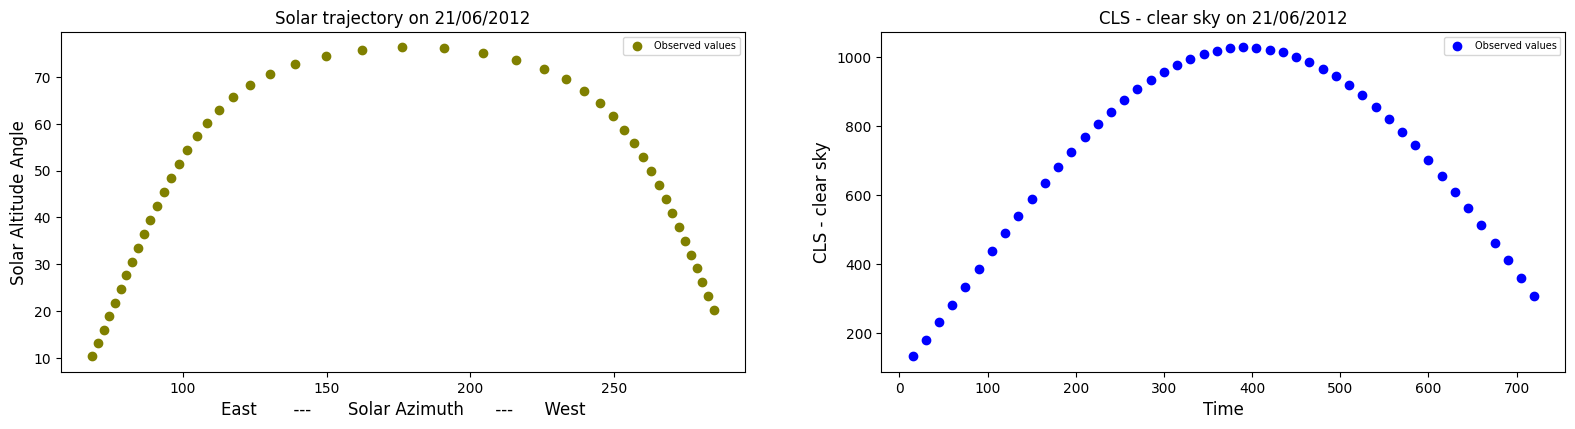

In [34]:
# to avoid a warning message 
#warnings.filterwarnings("ignore")
# CHANGE THE FOLLOWING CODE
plt.figure(figsize=(30,15))

gs = gridspec.GridSpec(3, 3)
ax1 = plt.subplot(gs[1, 0])
ax2 = plt.subplot(gs[1, -2])

# 1st subplot
ax1.scatter(azimuth, elevation , color='olive', label='Observed values')
ax1.set_title("Solar trajectory on 21/06/2012",fontsize=12)
ax1.set_xlabel("East       ---       Solar Azimuth      ---      West", fontsize = 12)
ax1.set_ylabel("Solar Altitude Angle", fontsize = 12)
ax1.legend(loc='upper right',fontsize=7);
# 2nd subplot
ax2.scatter(np.linspace(15, 720, num=48),clear_sky, color='blue', label='Observed values')
ax2.set_title("CLS - clear sky on 21/06/2012",fontsize=12)
ax2.set_xlabel("Time", fontsize = 12)
ax2.set_ylabel("CLS - clear sky", fontsize = 12)
ax2.legend(loc='upper right',fontsize=7);

### Features correlation

<AxesSubplot: >

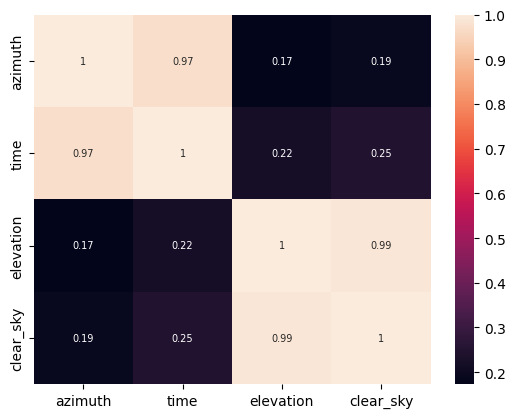

In [37]:
df = pd.DataFrame({'azimuth':azimuth,'time': np.linspace(15, 720, num=48),'elevation': elevation, 'clear_sky': clear_sky})
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 7})